In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target
print("Targets: {}".format(iris_dataset['target_names']))
print("Features: {}".format(iris_dataset['feature_names']))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("First 5 rows:\n{}".format(iris_dataset['data'][:5]))
print("Target names: {}".format(iris_dataset['target_names']))
print("Targets:\n{}".format(iris_dataset['target']))

Targets: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data: (150, 4)
First 5 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target names: ['setosa' 'versicolor' 'virginica']
Targets:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [4]:
y_pred = knn.predict(X_test) 
print("Score: {:.2f}".format(np.mean(y_pred == y_test))) 
print("Score: {:.2f}".format(knn.score(X_test, y_test)))
print("Training Score: {:.2f}".format(knn.score(X_train, y_train))) # u will see overfitted here


Score: 0.97
Score: 0.97
Training Score: 1.00


In [7]:
from sklearn.model_selection import cross_val_score
cross_val_scores = []

# Our goal here is to find the optimal value of k
neighbors = np.arange(1, 20, 2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10) # nb of folds is 10
    cross_val_scores.append(np.mean(scores))
    
print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors:", best_n_neighbors)
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

best cross-validation score: 0.964
best n_neighbors: 7
test-set score: 0.974


In [8]:
print('Length of list', len(cross_val_scores)) # 10 here because we did 10 CV
print('Max of list', max(cross_val_scores))

Length of list 10
Max of list 0.9636363636363635


Text(0, 0.5, 'Cross-validated accuracy')

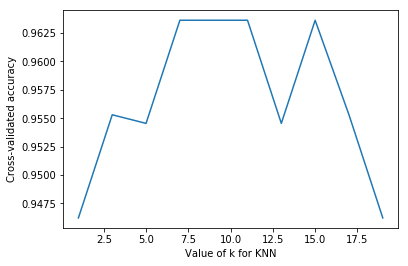

In [9]:
# we can plot to see how accuracy changes when varying k (as you can see, high values of k lead to overfitting)
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of k for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(neighbors, cross_val_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-validated accuracy')

In [14]:
# if you want to compare kNN with LogisticRegression on Iris-dataset
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
result = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
np.mean(result)

/Users/apta/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apta/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apta/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apta/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/apta/opt/anaconda3/lib/python3.7/site-packages/sklearn/

0.9533333333333334

In [10]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

param_grid = {'n_neighbors':  np.arange(1, 15, 2)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid,
                    cv=10, return_train_score=True)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.982
best parameters: {'n_neighbors': 5}
test-set score: 0.947


Gridseach results (try to check the result of at each fitting)

In [11]:
results = pd.DataFrame(grid.cv_results_)
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [27]:
results.params

0     {'n_neighbors': 1}
1     {'n_neighbors': 3}
2     {'n_neighbors': 5}
3     {'n_neighbors': 7}
4     {'n_neighbors': 9}
5    {'n_neighbors': 11}
6    {'n_neighbors': 13}
Name: params, dtype: object

In [30]:
from sklearn.model_selection import cross_validate
res = cross_validate(KNeighborsClassifier(), X, y, return_train_score=True,cv=5, scoring=["accuracy"])
res_df = pd.DataFrame(res)

In [31]:
res_df

,fit_time,score_time,test_accuracy,train_accuracy
0,0.000530,0.003203,0.966667,0.966667
1,0.000421,0.001592,1.000000,0.966667
2,0.000399,0.001555,0.933333,0.975000
3,0.000396,0.001475,0.966667,0.975000
4,0.000436,0.001659,1.000000,0.966667


Using Cross-Validation Generators


In [32]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, RepeatedStratifiedKFold
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
ss = ShuffleSplit(n_splits=20, train_size=.4, test_size=.3)
rs = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
print("KFold:")
print(cross_val_score(KNeighborsClassifier(), X, y, cv=kfold))
print("StratifiedKFold:")
print(cross_val_score(KNeighborsClassifier(), X, y, cv=skfold))
print("ShuffleSplit:")
print(cross_val_score(KNeighborsClassifier(), X, y, cv=ss))
print("RepeatedStratifiedKFold:")
print(cross_val_score(KNeighborsClassifier(), X, y, cv=rs))

KFold:
[1.         1.         0.83333333 0.93333333 0.8       ]
StratifiedKFold:
[1.         0.93333333 0.93333333 0.93333333 1.        ]
ShuffleSplit:
[0.93333333 0.97777778 0.86666667 0.97777778 0.91111111 0.93333333
 0.97777778 0.97777778 0.95555556 1.         0.93333333 1.
 0.97777778 0.97777778 0.97777778 0.95555556 0.95555556 0.97777778
 0.93333333 0.93333333]
RepeatedStratifiedKFold:
[0.93333333 0.93333333 1.         0.93333333 0.93333333 0.96666667
 1.         0.96666667 0.93333333 0.96666667 0.93333333 1.
 1.         0.93333333 0.93333333 0.96666667 1.         0.96666667
 0.93333333 0.96666667 1.         1.         0.96666667 0.93333333
 0.96666667 1.         0.9        0.96666667 0.96666667 1.
 0.96666667 0.96666667 1.         0.9        1.         1.
 0.96666667 0.93333333 0.96666667 1.         0.96666667 1.
 0.9        0.93333333 0.96666667 0.96666667 0.96666667 0.9
 0.93333333 1.        ]
